# Airbnb listings for German Capital City Berlin (up until 2023-12-18)

# Business understanding

The data is sourced from the Airbnb data website "http://insideairbnb.com/," featuring listings from German capital city Berlin. These listings were collected on December 18th, 2023. This dataset can serve as a valuable resource for offering recommendations to prospective guests on important factors to consider when booking an Airbnb in Berlin, along with highlighting the distinctive features of Airbnb accommodations in the city. To extract specific insights from the dataset, the following set of questions was formulated:

- Q1: What are the most prevalent room types in Berlin?
- Q2: Is there a difference in cleanliness between shared rooms and private rooms in Berlin?
- Q3: Are shared rooms cheaper per person than private rooms in Berlin?
- Q4: Do shared rooms and private rooms differ in value for money in Berlin?

# Data Understanding

The dataset comprises 13327 rows and 75 columns, encapsulating vital details regarding hosts, accommodation specifics, amenities, booking choices, guest feedback, pricing, and location. To streamline data analysis, specific columns have been excluded, such as URLs, columns with zero values, and those containing highly detailed descriptions of accommodations.

In [1]:
import pandas as pd
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

#import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Path of zip
file_path = 'listings.csv.gz'

# Read compressed CSV file pandas df
df = pd.read_csv(file_path, compression='gzip')

In [3]:
df.head()

,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,latitude,longitude,property_type,room_type,accommodates,bathrooms,bathrooms_text,bedrooms,beds,amenities,price,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,3176,https://www.airbnb.com/rooms/3176,20231218233220,2023-12-19,previous scrape,Rental unit in Berlin · ★4.63 · 1 bedroom · 2 ...,NaN,The neighbourhood is famous for its variety of...,https://a0.muscache.com/pictures/243355/84afcf...,3718,https://www.airbnb.com/users/show/3718,Britta,2008-10-19,"Coledale, Australia",We love to travel ourselves a lot and prefer t...,within a day,100%,17%,f,https://a0.muscache.com/im/users/3718/profile_...,https://a0.muscache.com/im/users/3718/profile_...,Prenzlauer Berg,1.0,1.0,"['email', 'phone']",t,t,"Berlin, Germany",Prenzlauer Berg Südwest,Pankow,52.53471,13.41810,Entire rental unit,Entire home/apt,4,NaN,1 bath,NaN,2.0,[],$83.00,63,184,63.0,63.0,184.0,184.0,63.0,184.0,NaN,t,0,0,0,15,2023-12-19,148,1,0,2009-06-20,2023-05-25,4.63,4.67,4.52,4.64,4.69,4.92,4.62,First name and Last name: Nicolas Krotz <br/> ...,f,1,1,0,0,0.84
1,9991,https://www.airbnb.com/rooms/9991,20231218233220,2023-12-19,city scrape,Rental unit in Berlin · ★5.0 · 4 bedrooms · 7 ...,NaN,Prenzlauer Berg is an amazing neighbourhood wh...,https://a0.muscache.com/pictures/42799131/59c8...,33852,https://www.airbnb.com/users/show/33852,Philipp,2009-08-25,"Berlin, Germany",Born in Munich - lives in and loves Berlin. Wo...,within a day,100%,NaN,f,https://a0.muscache.com/im/users/33852/profile...,https://a0.muscache.com/im/users/33852/profile...,Prenzlauer Berg,1.0,1.0,"['email', 'phone']",t,t,"Berlin, Germany",Prenzlauer Berg Südwest,Pankow,52.53269,13.41805,Entire rental unit,Entire home/apt,7,NaN,2.5 baths,NaN,7.0,[],$180.00,6,14,6.0,6.0,14.0,14.0,6.0,14.0,NaN,t,0,0,0,47,2023-12-19,7,0,0,2015-08-09,2020-01-04,5.00,5.00,5.00,5.00,5.00,4.86,4.86,03/Z/RA/003410-18,f,1,1,0,0,0.07
2,183988,https://www.airbnb.com/rooms/183988,20231218233220,2023-12-19,city scrape,Rental unit in Berlin · ★4.69 · 1 bedroom · 2 ...,NaN,NaN,https://a0.muscache.com/pictures/1041e6fd-c369...,882801,https://www.airbnb.com/users/show/882801,Minel,2011-07-28,"Berlin, Germany",Ich reise gerne. Lese fast alles was Aktuell a...,within a few hours,100%,99%,f,https://a0.muscache.com/im/pictures/user/48e51...,https://a0.muscache.com/im/pictures/user/48e51...,Charlottenburg,2.0,2.0,"['email', 'phone']",t,t,NaN,Neue Kantstraße,Charlottenburg-Wilm.,52.50001,13.30349,Entire rental unit,Entire home/apt,4,NaN,1 bath,NaN,2.0,[],$116.00,2,365,2.0,2.0,365.0,365.0,2.0,365.0,NaN,t,27,54,81,336,2023-12-19,570,50,1,2012-01-07,2023-11-26,4.69,4.73,4.73,4.78,4.79,4.72,4.62,04/Z/ZA/004232-16,f,1,1,0,0,3.92
3,14325,https://www.airbnb.com/rooms/14325,20231218233220,2023-12-19,city scrape,Rental unit in Berlin · ★4.68 · Studio · 1 bed...,NaN,NaN,https://a0.muscache.com/pictures/508703/

In [4]:
#get shape of df
df.shape

(13327, 75)

In [5]:
df.columns

Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'source', 'name',
       'description', 'neighborhood_overview', 'picture_url', 'host_id',
       'host_url', 'host_name', 'host_since', 'host_location', 'host_about',
       'host_response_time', 'host_response_rate', 'host_acceptance_rate',
       'host_is_superhost', 'host_thumbnail_url', 'host_picture_url',
       'host_neighbourhood', 'host_listings_count',
       'host_total_listings_count', 'host_verifications',
       'host_has_profile_pic', 'host_identity_verified', 'neighbourhood',
       'neighbourhood_cleansed', 'neighbourhood_group_cleansed', 'latitude',
       'longitude', 'property_type', 'room_type', 'accommodates', 'bathrooms',
       'bathrooms_text', 'bedrooms', 'beds', 'amenities', 'price',
       'minimum_nights', 'maximum_nights', 'minimum_minimum_nights',
       'maximum_minimum_nights', 'minimum_maximum_nights',
       'maximum_maximum_nights', 'minimum_nights_avg_ntm',
       'maximum_nights_avg_ntm', 'ca

In [6]:
# check for nan values in dataset
df.isnull().sum()

id                                                  0
listing_url                                         0
scrape_id                                           0
last_scraped                                        0
source                                              0
name                                                0
description                                     13327
neighborhood_overview                            6460
picture_url                                         0
host_id                                             0
host_url                                            0
host_name                                           9
host_since                                          9
host_location                                    2415
host_about                                       6528
host_response_time                               5052
host_response_rate                               5052
host_acceptance_rate                             4306
host_is_superhost           

# Data preparation

For efficient data analysis and utilization, the data is formatted appropriately, additional columns are created, and rows with missing values are removed.

In [7]:
#Filter out data from previous scrape 
df = df.loc[df.source != 'previous scrape',:]

In [8]:
# remove durrency sign and convert to dtype to float
df['price'] = df['price'].str.replace('[$,]', '', regex=True)
df['price'] = df['price'].astype(float)
# change the column name to price_USD
df.rename(columns={'price':'price_USD'}, inplace=True)

In [9]:
# drop nan values for prices
df.dropna(subset='price_USD', inplace=True)

In [20]:
def currency_Dollar_EUR(df,column, conversion_rate):
    """
    This function converts a dollar denoted column to EUR
    
    Input:
    df = data frame
    column = dollar column to be converted to EUR
    conversion_rate = conversion rate to be applied
    """
    df[column] = (df[column] * conversion_rate).round(2)
    return df[column]

In [21]:
# add price converted to EUR for scrape date 2023-12-18 (found here: https://de.exchangerates.org.uk/historischen/USD-EUR.html)
df['price_EUR'] = currency_Dollar_EUR(df,'price_USD',0.9155)

In [12]:
# calculate prices per bed in the accomodation
df['price_per_person_EUR'] = df['price_EUR']/df['accommodates']

In [13]:
# calculate value for money
df['value_for_money'] = df['review_scores_rating']/df['price_per_person_EUR']

In [14]:
df.room_type.unique()

array(['Entire home/apt', 'Private room', 'Shared room', 'Hotel room'],
      dtype=object)

# Analysis

# Q1: What are the most prevalent room types in Berlin?

In [15]:
#create a condensed df with room type counts
room_types = df.value_counts(['room_type']).reset_index()
room_types = room_types.rename(columns={0: 'count'})
#calculate relative share
room_types['share'] = (room_types['count']/df.shape[0]*100).round(2)
room_types

,room_type,count,share
0,Entire home/apt,5960,70.70
1,Private room,2188,25.95
2,Shared room,166,1.97
3,Hotel room,116,1.38


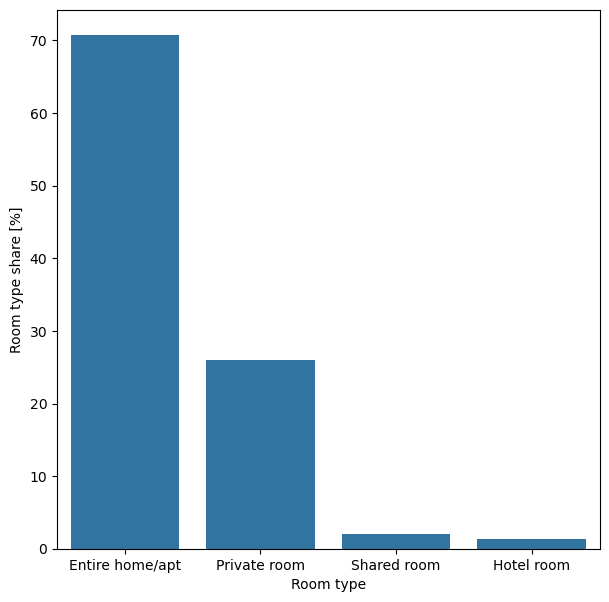

In [16]:
f, ax = plt.subplots(figsize=(7, 7))
ax.set_ylabel('Room type share [%]')
ax.set_xlabel('Room type')
graph = sns.barplot(data=room_types, y="share", x = 'room_type')
plt.show(graph)

## Q2: Is there a difference in cleanliness between shared rooms and private rooms in Berlin?

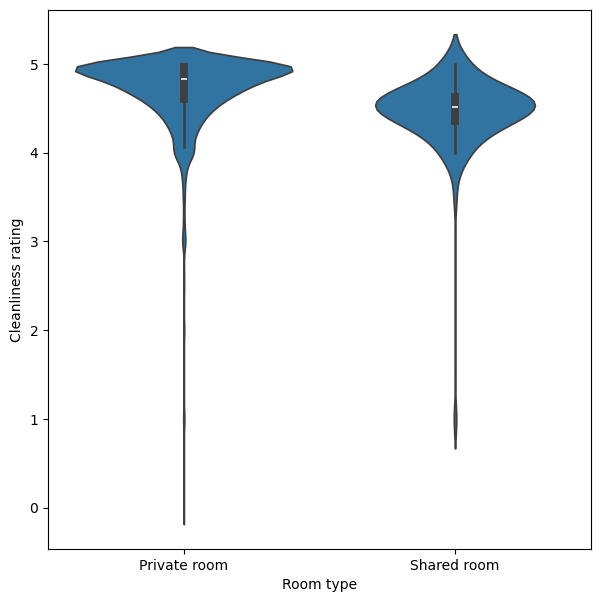

In [17]:
f, ax = plt.subplots(figsize=(7, 7))
ax.set_ylabel('Cleanliness rating')
ax.set_xlabel('Room type')
graph = sns.violinplot(data=df.loc[(df.room_type == 'Shared room') | (df.room_type == 'Private room'),:], y="review_scores_cleanliness", x = 'room_type')
plt.show(graph)

# Q3: Are shared rooms cheaper per person than private rooms in Berlin?

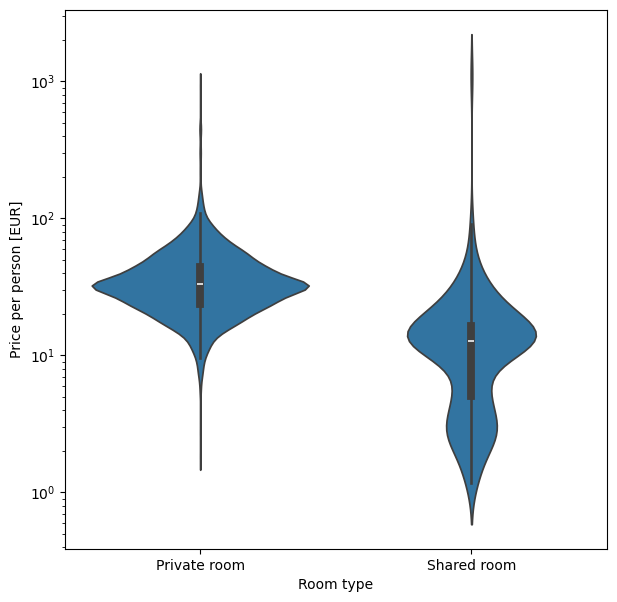

In [18]:
f, ax = plt.subplots(figsize=(7, 7))
ax.set_ylabel('Price per person [EUR]')
ax.set_xlabel('Room type')
graph = sns.violinplot(data=df.loc[(df.room_type == 'Shared room') | (df.room_type == 'Private room'),:], y="price_per_person_EUR", x = 'room_type', log_scale = True)
plt.show(graph)

# Q4: Do shared rooms and private rooms differ in value for money  in Berlin?

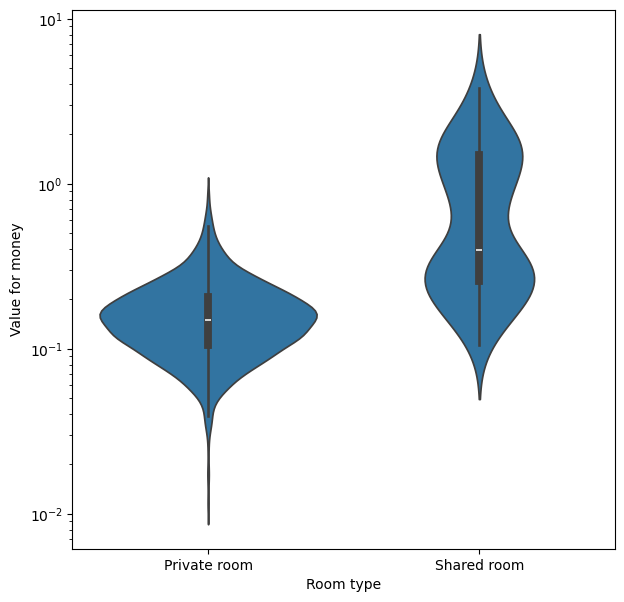

In [19]:
f, ax = plt.subplots(figsize=(7, 7))
ax.set_ylabel('Value for money')
ax.set_xlabel('Room type')
graph = sns.violinplot(data=df.loc[(df.room_type == 'Shared room') | (df.room_type == 'Private room'),:], y="value_for_money", x = 'room_type', log_scale = True)
plt.show(graph)

# Conclusion

The above analysis of Airbnb listings in Berlin reveals:

1. The majority of listings in Berlin are entire homes or appartements, covering 71%. Private rooms add 26%, while shared rooms and hotel rooms are less common on Airbnb.

2. One prejudice against shared rooms could be the lack of cleanliness. The data does indeed show a lower rating of cleanliness in shared rooms, although the difference to private rooms is rather small.

3. But there must be a reason for shared rooms. And yes, they are significantly cheaper than private rooms as backed by the data.

4. What if we bring both findings from Q2. and Q3. together? If we consider value for money (rating divided / price per person), then Shared rooms seem to have an advantage over private rooms.